In [1]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd
from datetime import datetime

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("../data/cases_hospital_bed_usa_statewise.csv")

In [8]:
df = df[['date', 'state', 'new_confirmed']]
df.head()

,date,state,new_confirmed
0,2020-03-23,AK,4.0
1,2020-03-24,AK,7.0
2,2020-03-25,AK,14.0
3,2020-03-26,AK,11.0
4,2020-03-27,AK,17.0


In [9]:
df['date'] = df['date'].map(lambda row: datetime.strptime(row, '%Y-%m-%d').date())
df = df.set_index('date')

IA
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

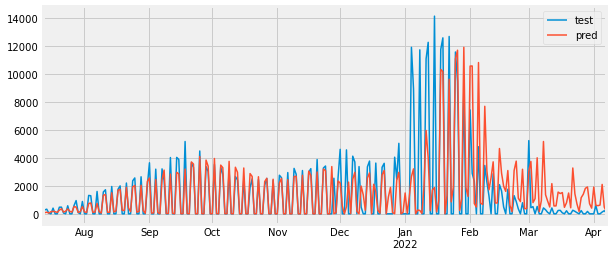

CO
Number of rows with missing values: 0.00395778364116095
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 488
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-11 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-11 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-11 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-11 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-1

<Figure size 432x288 with 0 Axes>

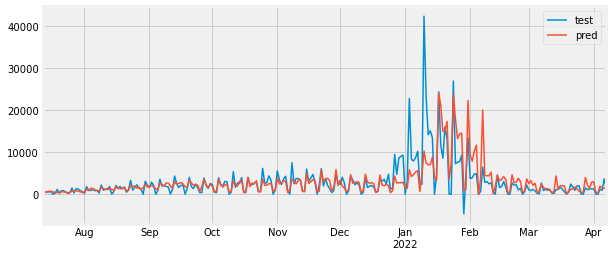

KY
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

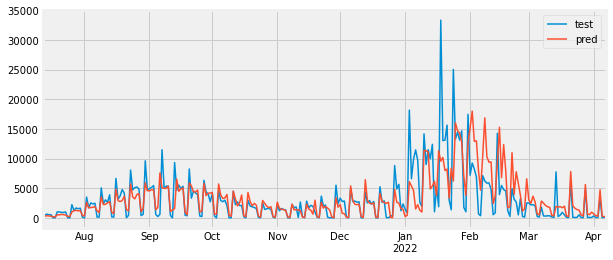

NH
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 472
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-27 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-27 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-27 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-27 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-27 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

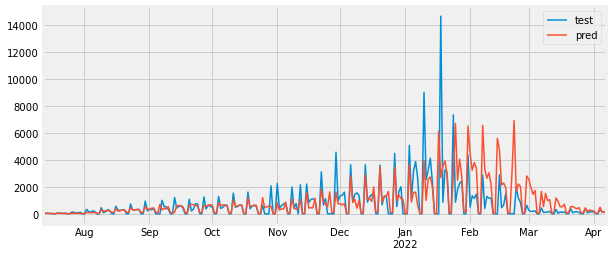

WA
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 500
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-02-28 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-02-28 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-02-28 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-02-28 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-02-28 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

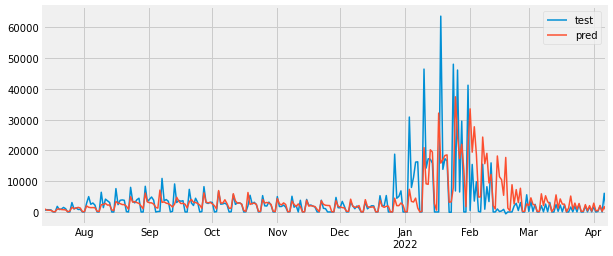

WI
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

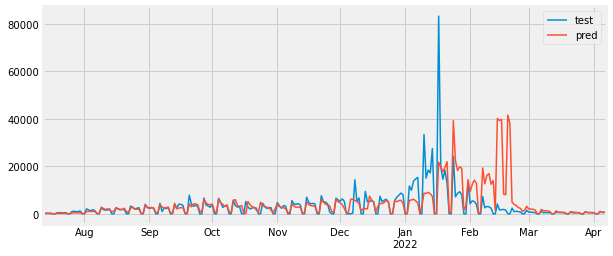

NC
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 537
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-01-22 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-01-22 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-01-22 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-01-22 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-01-22 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

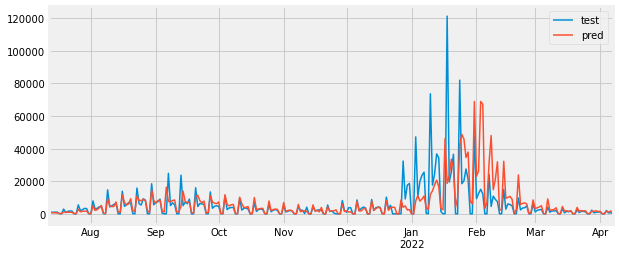

WY
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

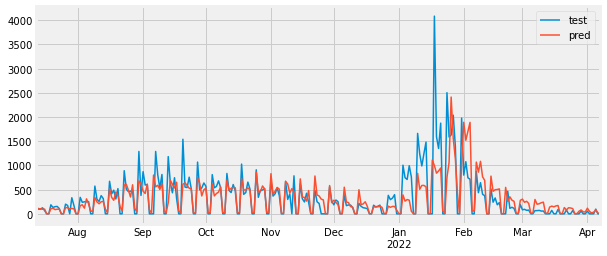

MO
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 505
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-02-23 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-02-23 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-02-23 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-02-23 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-02-23 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

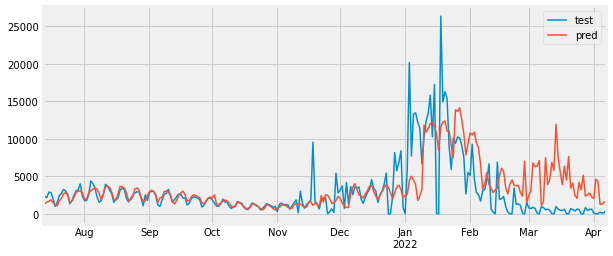

WV
Number of rows with missing values: 0.02871410736579276
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 531
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-01-28 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-01-28 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-01-28 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-01-28 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-01-2

<Figure size 432x288 with 0 Axes>

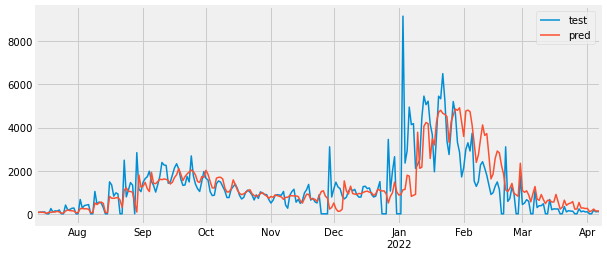

MA
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 472
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-27 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-27 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-27 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-27 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-27 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

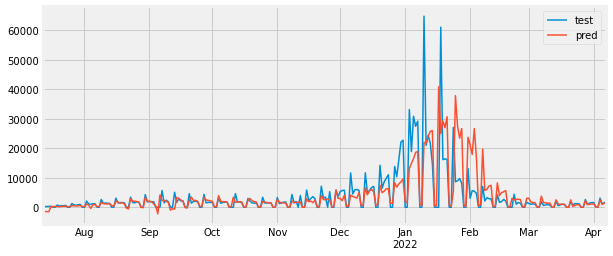

GA
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

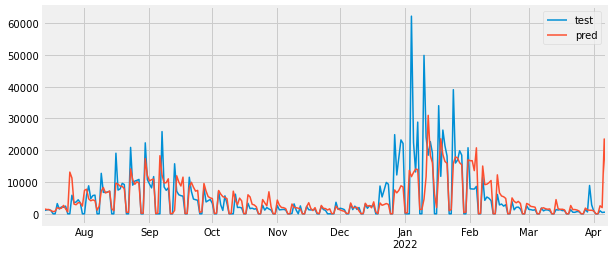

MN
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 537
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-01-22 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-01-22 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-01-22 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-01-22 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-01-22 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

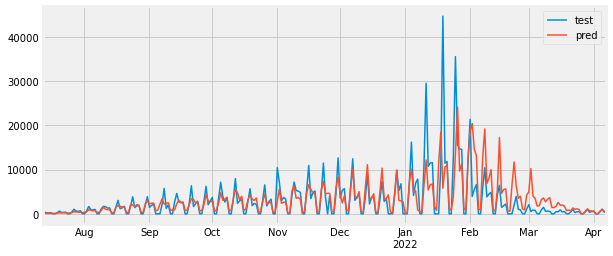

MD
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

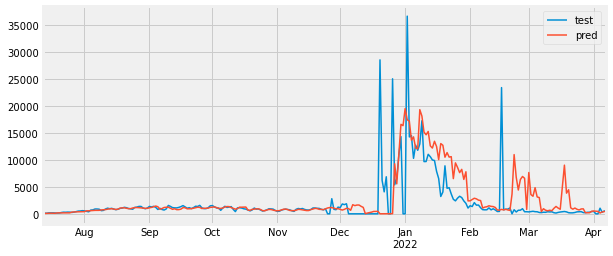

MT
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 537
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-01-22 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-01-22 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-01-22 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-01-22 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-01-22 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

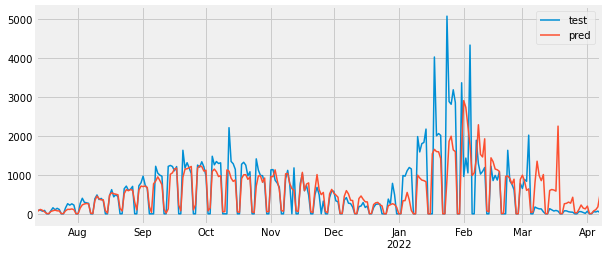

UT
Number of rows with missing values: 0.007947019867549669
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 485
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-14 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-14 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-14 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-14 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-

<Figure size 432x288 with 0 Axes>

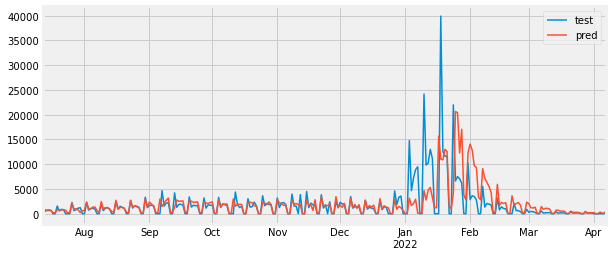

VA
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 497
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-02 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-02 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-02 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-02 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-02 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

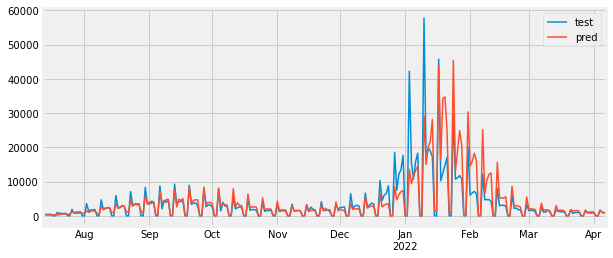

AK
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 476
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-23 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-23 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-23 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-23 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-23 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

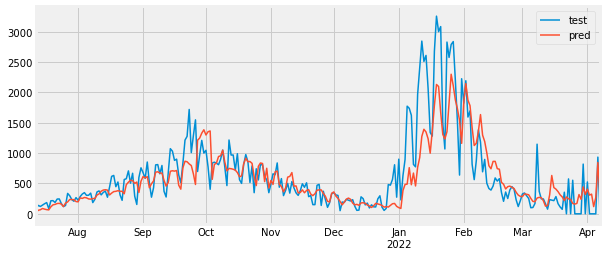

RI
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 496
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-03 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-03 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-03 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-03 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-03 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

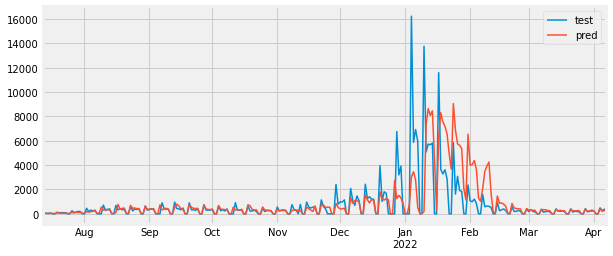

CA
Number of rows with missing values: 0.02644836272040302
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 524
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-02-04 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-02-04 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-02-04 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-02-04 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-02-0

<Figure size 432x288 with 0 Axes>

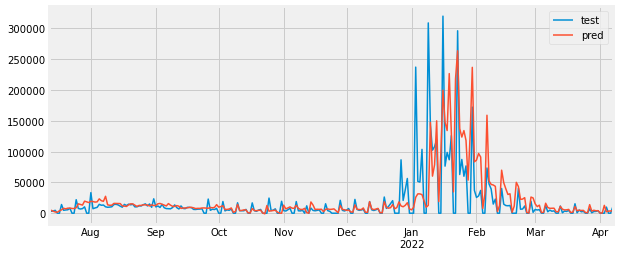

OH
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

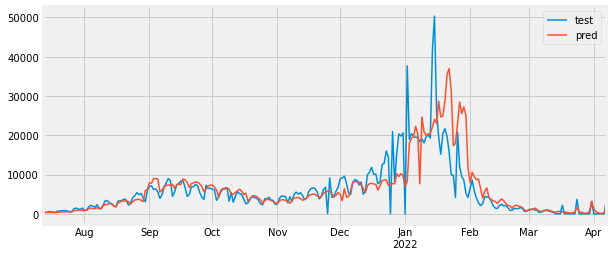

ID
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 486
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-13 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-13 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-13 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-13 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-13 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

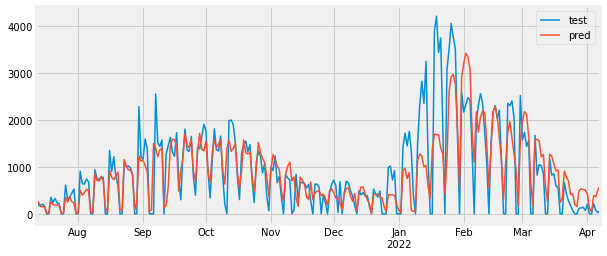

MI
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

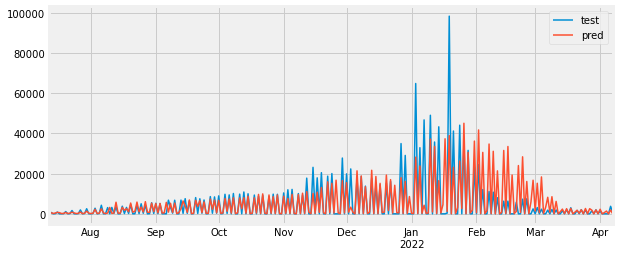

NY
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 485
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-14 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-14 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-14 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-14 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-14 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

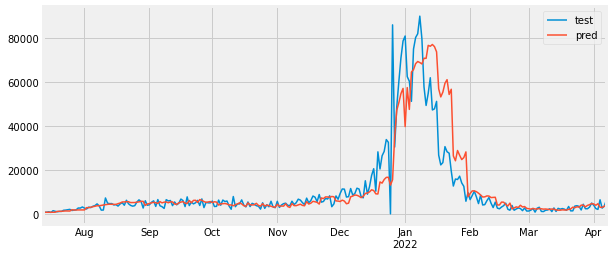

OK
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

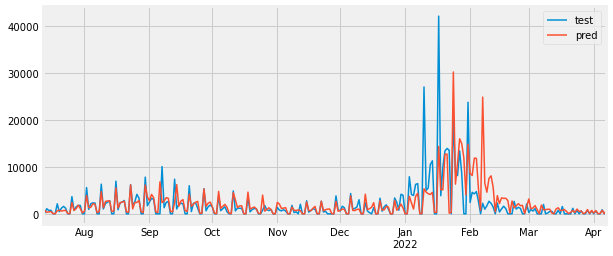

AZ
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 497
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-02 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-02 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-02 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-02 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-02 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

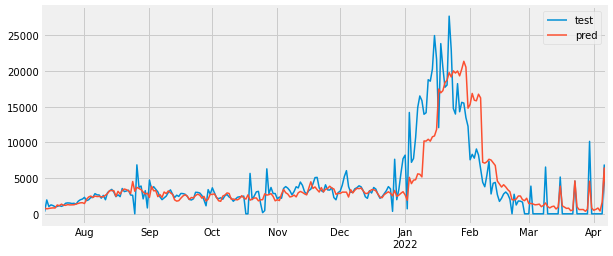

OR
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 504
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-02-24 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-02-24 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-02-24 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-02-24 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-02-24 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

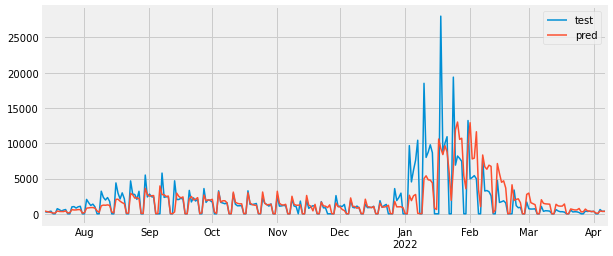

LA
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

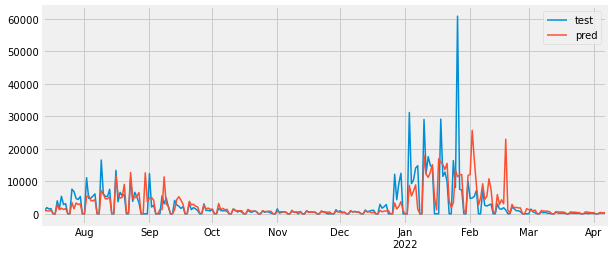

VT
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 482
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-17 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-17 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-17 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-17 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-17 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

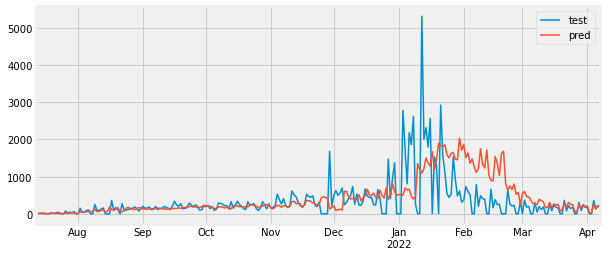

DE
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 472
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-27 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-27 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-27 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-27 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-27 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

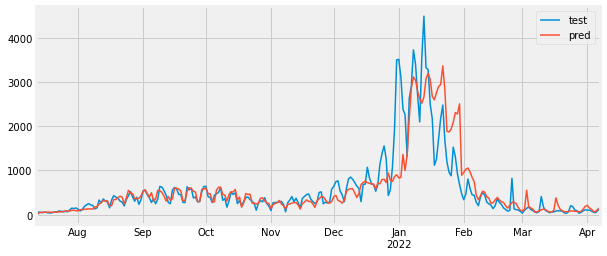

IN
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 537
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-01-22 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-01-22 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-01-22 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-01-22 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-01-22 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

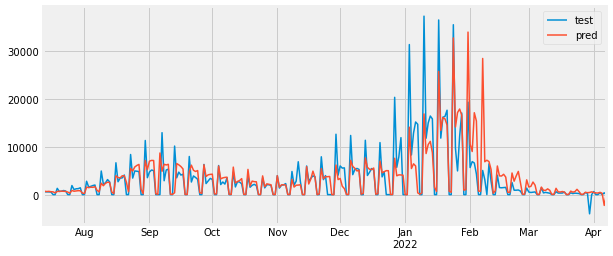

VI
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 460
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-04-08 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-04-08 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-04-08 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-04-08 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-04-08 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

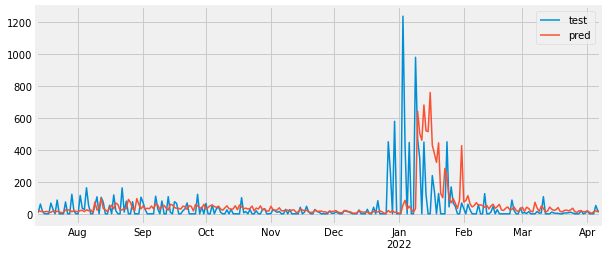

NE
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

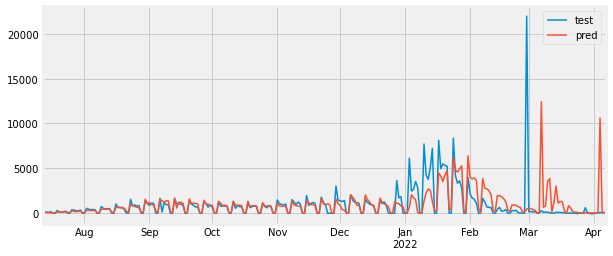

CT
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 481
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-18 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-18 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-18 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-18 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-18 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

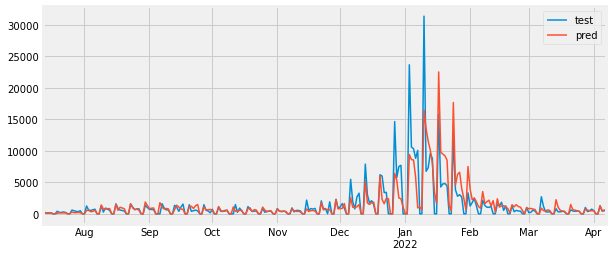

MS
Number of rows with missing values: 0.001282051282051282
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 510
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-02-18 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-02-18 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-02-18 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-02-18 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-02-

<Figure size 432x288 with 0 Axes>

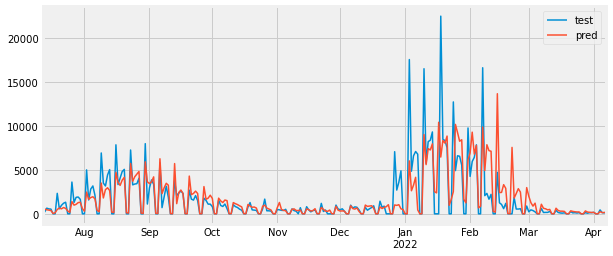

ME
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

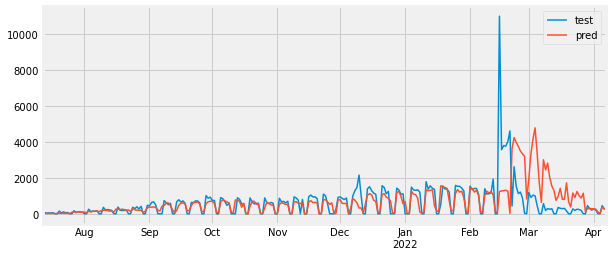

NV
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 535
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-01-24 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-01-24 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-01-24 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-01-24 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-01-24 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

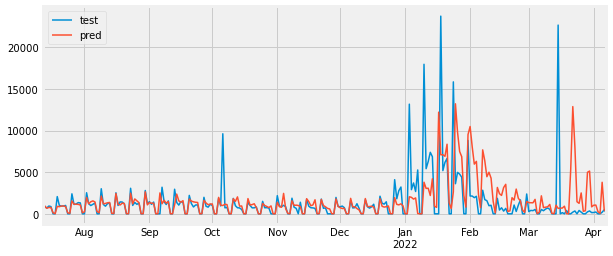

NM
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 485
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-14 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-14 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-14 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-14 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-14 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

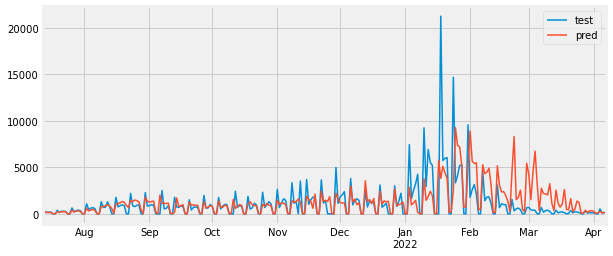

PR
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

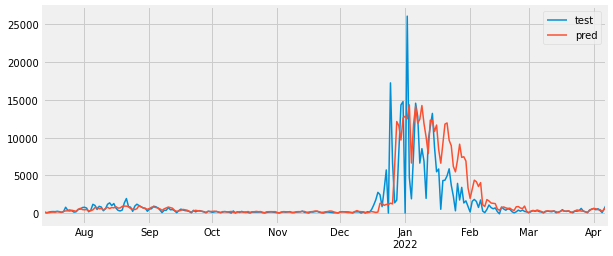

SC
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 497
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-02 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-02 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-02 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-02 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-02 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

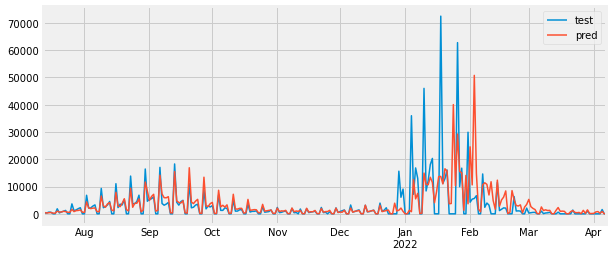

DC
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 471
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-28 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-28 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-28 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-28 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-28 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

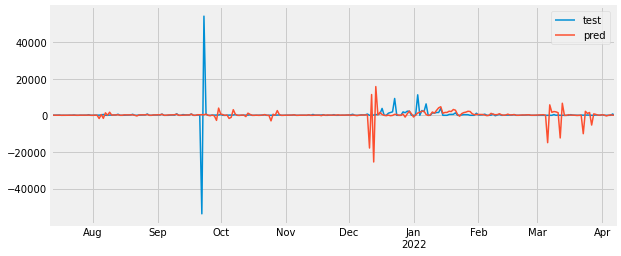

IL
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 510
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-02-18 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-02-18 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-02-18 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-02-18 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-02-18 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

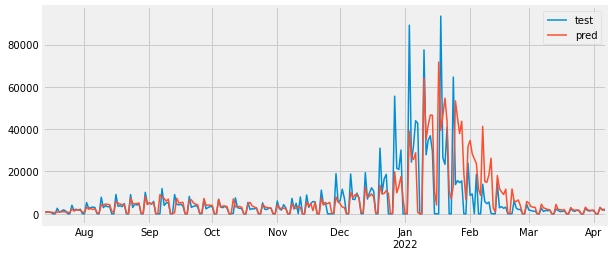

ND
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

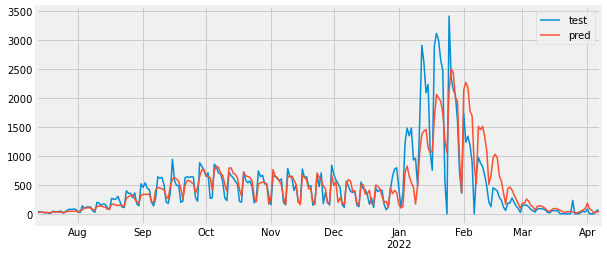

NJ
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

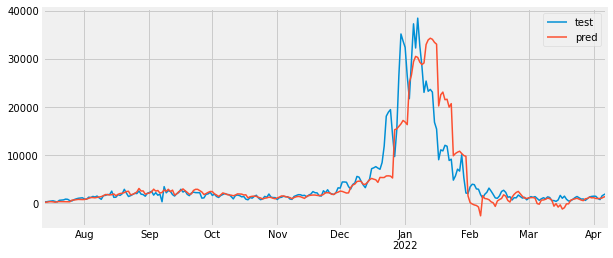

SD
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 474
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-25 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-25 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-25 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-25 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-25 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

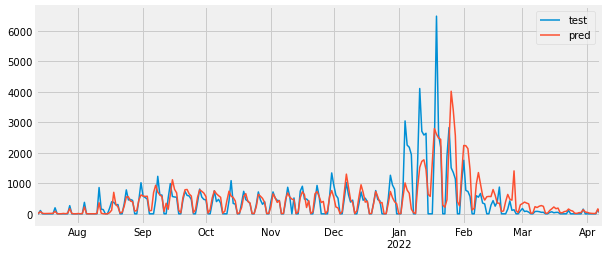

AR
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 488
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-11 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-11 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-11 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-11 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-11 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

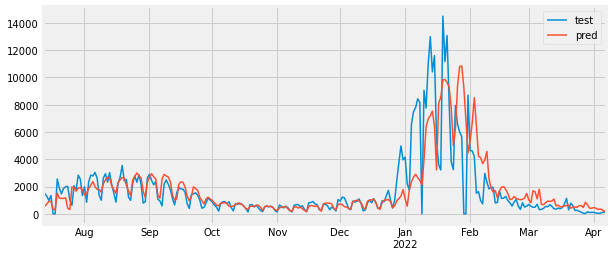

PA
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 39
    Number of steps per fold: 7
    Last fold only includes 4 observations.

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-07-18 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-07-18 00:00:00
    Validation: 2021-07-19 00:00:00 -- 2021-07-25 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-07-25 00:00:00
    Validation: 2021-07-26 00:00:00 -- 2021-08-01 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-08-01 00:00:00
    Validation: 2021-08-02 00:00:00 -- 2021-08-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 20

<Figure size 432x288 with 0 Axes>

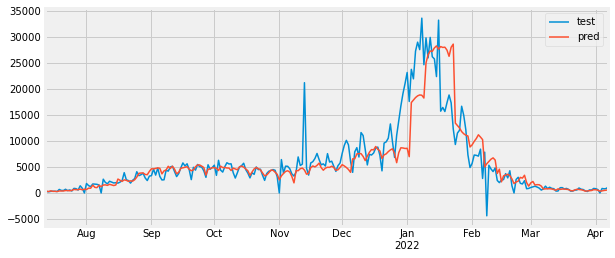

AS
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0


Exception: `initial_train_size` must be greater than forecaster's window_size (90).

In [11]:
for state in set(df['state']):
    data = df[df['state'] == state]
    data = data.rename(columns={'new_confirmed': 'y'})
    data = data.asfreq('D') # or D
    data = data.sort_index()
    
    print(state)
    print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')
    data = data.fillna(method='ffill')
    print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')
    steps = 75
    data_train = data[:-steps]
    data_test  = data[-steps:]
    
    regressor = RandomForestRegressor(max_depth=10, n_estimators=500, random_state=123)
    forecaster = ForecasterAutoreg(
                    regressor = regressor,
                    lags      = 90
                 )

    forecaster.fit(y=data_train['y'])
    steps = 7
    n_backtesting = 90*3 # The last 9 years are separated for the backtest
    
    metric, predictions_backtest = backtesting_forecaster(
                                        forecaster = forecaster,
                                        y          = data['y'],
                                        initial_train_size = len(data) - n_backtesting,
                                        fixed_train_size   = False,
                                        steps      = steps,
                                        metric     = 'mean_squared_error',
                                        refit      = True,
                                        verbose    = True
                                        )
    
    dest_path = "../data/model_" + state + "_values.csv"
    f_path = "../data/model_" + state + "_feature.csv"
    final_data = {'date': list(predictions_backtest.index.values), 'y': list(data.loc[predictions_backtest.index, 'y'].values), "pred": list(predictions_backtest['pred'].values)}
    res_df = pd.DataFrame(final_data)
    res_df.to_csv(dest_path)
    f_df = forecaster.get_feature_importance()
    f_df.to_csv(f_path)
    
    plt.figure()
    fig, ax = plt.subplots(figsize=(9, 4))
    data.loc[predictions_backtest.index, 'y'].plot(ax=ax, label='test')
    predictions_backtest.plot(ax=ax, label='predictions')
    ax.legend();
    plt.show()
    

CA
Number of rows with missing values: 0.02644836272040302
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 524
Number of observations used for backtesting: 270
    Number of folds: 9
    Number of steps per fold: 30

Data partition in fold: 0
    Training:   2020-02-04 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-08-10 00:00:00
Data partition in fold: 1
    Training:   2020-02-04 00:00:00 -- 2021-08-10 00:00:00
    Validation: 2021-08-11 00:00:00 -- 2021-09-09 00:00:00
Data partition in fold: 2
    Training:   2020-02-04 00:00:00 -- 2021-09-09 00:00:00
    Validation: 2021-09-10 00:00:00 -- 2021-10-09 00:00:00
Data partition in fold: 3
    Training:   2020-02-04 00:00:00 -- 2021-10-09 00:00:00
    Validation: 2021-10-10 00:00:00 -- 2021-11-08 00:00:00
Data partition in fold: 4
    Training:   2020-02-04 00:00:00 -- 2021-11-08 00:00:00
    Valida

<Figure size 432x288 with 0 Axes>

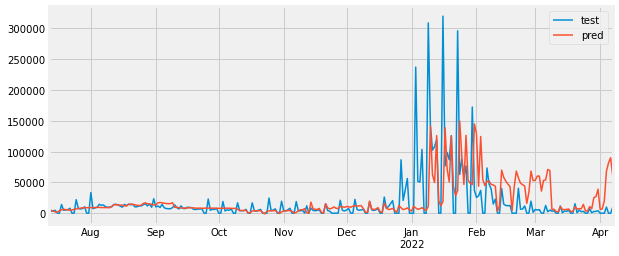

OH
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 498
Number of observations used for backtesting: 270
    Number of folds: 9
    Number of steps per fold: 30

Data partition in fold: 0
    Training:   2020-03-01 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-08-10 00:00:00
Data partition in fold: 1
    Training:   2020-03-01 00:00:00 -- 2021-08-10 00:00:00
    Validation: 2021-08-11 00:00:00 -- 2021-09-09 00:00:00
Data partition in fold: 2
    Training:   2020-03-01 00:00:00 -- 2021-09-09 00:00:00
    Validation: 2021-09-10 00:00:00 -- 2021-10-09 00:00:00
Data partition in fold: 3
    Training:   2020-03-01 00:00:00 -- 2021-10-09 00:00:00
    Validation: 2021-10-10 00:00:00 -- 2021-11-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-01 00:00:00 -- 2021-11-08 00:00:00
    Validation: 2021-11-09

<Figure size 432x288 with 0 Axes>

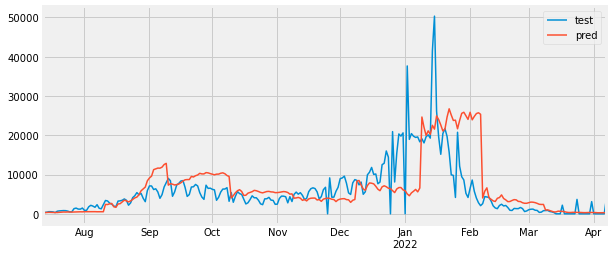

NY
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 485
Number of observations used for backtesting: 270
    Number of folds: 9
    Number of steps per fold: 30

Data partition in fold: 0
    Training:   2020-03-14 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-08-10 00:00:00
Data partition in fold: 1
    Training:   2020-03-14 00:00:00 -- 2021-08-10 00:00:00
    Validation: 2021-08-11 00:00:00 -- 2021-09-09 00:00:00
Data partition in fold: 2
    Training:   2020-03-14 00:00:00 -- 2021-09-09 00:00:00
    Validation: 2021-09-10 00:00:00 -- 2021-10-09 00:00:00
Data partition in fold: 3
    Training:   2020-03-14 00:00:00 -- 2021-10-09 00:00:00
    Validation: 2021-10-10 00:00:00 -- 2021-11-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-14 00:00:00 -- 2021-11-08 00:00:00
    Validation: 2021-11-09

<Figure size 432x288 with 0 Axes>

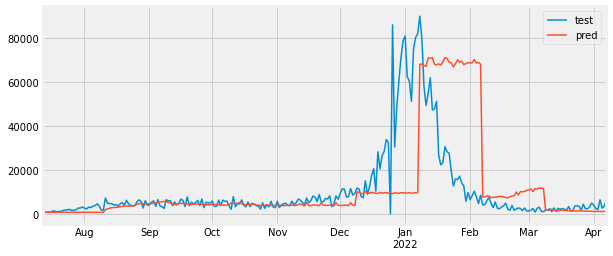

UT
Number of rows with missing values: 0.007947019867549669
Number of rows with missing values: 0.0
Information of backtesting process
----------------------------------
Number of observations used for initial training: 485
Number of observations used for backtesting: 270
    Number of folds: 9
    Number of steps per fold: 30

Data partition in fold: 0
    Training:   2020-03-14 00:00:00 -- 2021-07-11 00:00:00
    Validation: 2021-07-12 00:00:00 -- 2021-08-10 00:00:00
Data partition in fold: 1
    Training:   2020-03-14 00:00:00 -- 2021-08-10 00:00:00
    Validation: 2021-08-11 00:00:00 -- 2021-09-09 00:00:00
Data partition in fold: 2
    Training:   2020-03-14 00:00:00 -- 2021-09-09 00:00:00
    Validation: 2021-09-10 00:00:00 -- 2021-10-09 00:00:00
Data partition in fold: 3
    Training:   2020-03-14 00:00:00 -- 2021-10-09 00:00:00
    Validation: 2021-10-10 00:00:00 -- 2021-11-08 00:00:00
Data partition in fold: 4
    Training:   2020-03-14 00:00:00 -- 2021-11-08 00:00:00
    Valid

<Figure size 432x288 with 0 Axes>

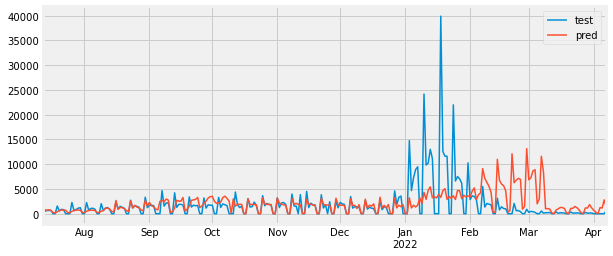

In [12]:
for state in set(['NY', 'CA', 'UT', 'OH']):
    data = df[df['state'] == state]
    data = data.rename(columns={'new_confirmed': 'y'})
    data = data.asfreq('D') # or D
    data = data.sort_index()
    
    print(state)
    print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')
    data = data.fillna(method='ffill')
    print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')
    steps = 75
    data_train = data[:-steps]
    data_test  = data[-steps:]
    
    regressor = RandomForestRegressor(max_depth=10, n_estimators=500, random_state=123)
    forecaster = ForecasterAutoreg(
                    regressor = regressor,
                    lags      = 90
                 )

    forecaster.fit(y=data_train['y'])
    steps = 30
    n_backtesting = 90*3 # The last 9 years are separated for the backtest
    
    metric, predictions_backtest = backtesting_forecaster(
                                        forecaster = forecaster,
                                        y          = data['y'],
                                        initial_train_size = len(data) - n_backtesting,
                                        fixed_train_size   = False,
                                        steps      = steps,
                                        metric     = 'mean_squared_error',
                                        refit      = True,
                                        verbose    = True
                                        )
    
    dest_path = "../data/model_" + state + "_values_30.csv"
    f_path = "../data/model_" + state + "_feature_30.csv"
    final_data = {'date': list(predictions_backtest.index.values), 'y': list(data.loc[predictions_backtest.index, 'y'].values), "pred": list(predictions_backtest['pred'].values)}
    res_df = pd.DataFrame(final_data)
    res_df.to_csv(dest_path)
    f_df = forecaster.get_feature_importance()
    f_df.to_csv(f_path)
    
    plt.figure()
    fig, ax = plt.subplots(figsize=(9, 4))
    data.loc[predictions_backtest.index, 'y'].plot(ax=ax, label='test')
    predictions_backtest.plot(ax=ax, label='predictions')
    ax.legend();
    plt.show()
    